importing all required libraries


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

installing icecream to make code easrier


In [24]:
!pip install icecream
from icecream import ic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


reading csv file 

In [25]:
df=pd.read_csv('singdata1950-2022.csv', header=None)


making a scaling factor

In [26]:
year=df.iloc[1:,0].values.astype('int')
population=df.iloc[1:,1].values.astype('int')
#first is for rows and second is columns
scaling_factor=max(population)
population=population/max(population)
print(year)
print(population)

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021]
[0.17920358 0.18726871 0.19759558 0.20895688 0.21884543 0.22889177
 0.240481   0.25351302 0.26628941 0.2782819  0.28866136 0.29847978
 0.31471522 0.31734516 0.32288555 0.33082794 0.33915606 0.34673027
 0.35276158 0.35810911 0.36372086 0.37045226 0.37737774 0.38449609
 0.39094819 0.39669898 0.40208157 0.4076921  0.4126539  0.41789623
 0.42323412 0.44407896 0.46400175 0.47006725 0.47903707 0.4796921
 0.47923905 0.48650047 0.49900475 0.5138714  0.53425005 0.54967039
 0.56643446 0.58094695 0.59945764 0.61794746 0.64358019 0.66555485
 0.68855361 0.69407822 0.70620466 0.72551274 0.73216437 0.72144757
 0.73053627 0.747911   0.771686

ploting 

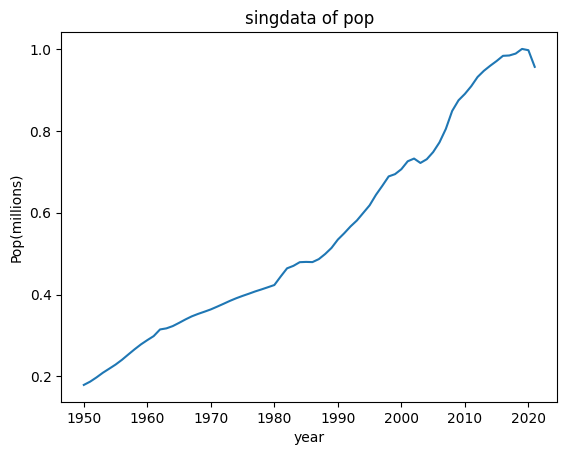

In [27]:
plt.xlabel('year')
plt.ylabel('Pop(millions)')
plt.title('singdata of pop')
plt.plot(year,population)

making test data

In [28]:
test_year=year[-3:].reshape(-1,1)
print(test_year)

[[2019]
 [2020]
 [2021]]


removing test data from the array

In [29]:
test_pop=population[-3:].reshape(-1,1)
print(test_pop)

[[1.        ]
 [0.99688581]
 [0.95616727]]


training the ml

In [30]:
train_pop, train_year = population[:-3].reshape(-1,1), year[:-3].reshape(-1,1)
print(train_year)

[[1950]
 [1951]
 [1952]
 [1953]
 [1954]
 [1955]
 [1956]
 [1957]
 [1958]
 [1959]
 [1960]
 [1961]
 [1962]
 [1963]
 [1964]
 [1965]
 [1966]
 [1967]
 [1968]
 [1969]
 [1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]]


finding the intercept and slope

In [31]:
lrp=lm.LinearRegression()
lrp.fit(train_year, train_pop)
slope=lrp.coef_[0]
intercept=lrp.intercept_
print("y="+str(slope)+'x'+str(intercept))

y=[0.01167588]x[-22.635137]


predicting the data then finding mean squared error and mean absolute error

In [32]:
train_pred=lrp.predict(train_year)
mse_train=mean_squared_error(train_pred, train_pop)
mae_train=mean_absolute_error(train_pred, train_pop)

test_pred=lrp.predict(test_year)
mse_test=mean_squared_error(test_pred,test_pop)
mae_test=mean_absolute_error(test_pred, test_pop)

ic(mse_train)
ic(mse_test)
ic(mae_train)
ic(mae_test)

ic| mse_train: 0.0021247105871611523
ic| mse_test: 0.0020006968057079723
ic| mae_train: 0.04036377304821222
ic| mae_test: 0.03797408578655052


0.03797408578655052

plotting the best fit line

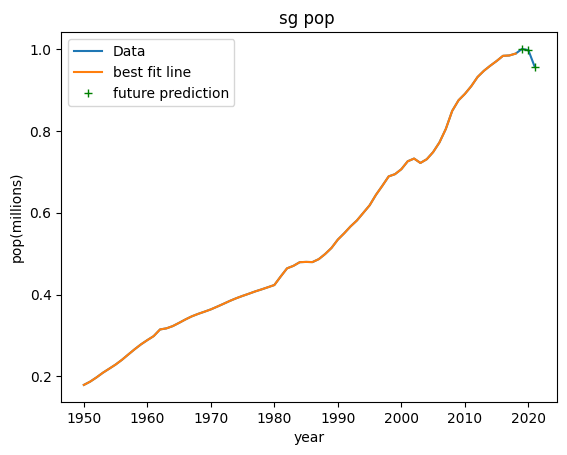

In [33]:
plt.xlabel('year')
plt.ylabel('pop(millions)')
plt.title('sg pop ')
plt.plot(year,population, label='Data')
plt.plot(train_year, train_pop, label='best fit line')
plt.plot(test_year, test_pop,'g+', label='future prediction')
plt.legend()

prediccting population and scaling according to millions

In [34]:
lrp.predict([[2030],[2050]])*scaling_factor

array([[6085177.04360004],
       [7417061.20874436]])

same steps for india

In [35]:
#for india

df1=pd.read_csv('indiadata1950-2022.csv')

In [36]:
year1=df1.iloc[1:,0].values.astype('int')
population1=df1.iloc[1:,1].values.astype('int')
#first is for rows and second is columns
scaling_factor1=max(population1)
population1=population1/max(population1)
print(year1)
print(population1)

[1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]
[0.25750019 0.26319803 0.26900573 0.2750062  0.28124861 0.28765475
 0.29420215 0.30080711 0.30758439 0.31467896 0.3220156  0.32954631
 0.33724433 0.34509495 0.35289572 0.36057175 0.36832977 0.37640559
 0.38479043 0.39338968 0.40220856 0.411268   0.42063136 0.43023814
 0.43997744 0.44980491 0.45984897 0.47013856 0.48070934 0.49170306
 0.50302201 0.5145239  0.52627764 0.53832176 0.55056227 0.56300741
 0.57559382 0.58830473 0.60120576 0.61421722 0.62726403 0.64041154
 0.65366133 0.66700526 0.68042435 0.69383279 0.70727787 0.72075495
 0.73420812 0.74770938 0.76135431 0.7750027  0.78848171 0.80178245
 0.81474779 0.82726219 0.83948

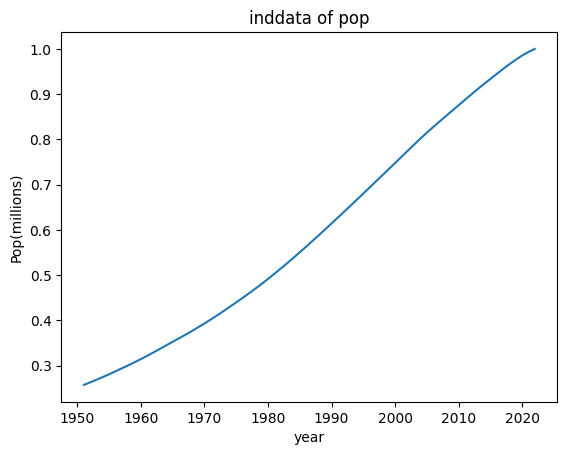

In [37]:
plt.xlabel('year')
plt.ylabel('Pop(millions)')
plt.title('inddata of pop')
plt.plot(year1,population1)

In [38]:
test_year1=year[-3:].reshape(-1,1)
print(test_year1)

[[2019]
 [2020]
 [2021]]


In [39]:
test_pop1=population[-3:].reshape(-1,1)
print(test_pop1)

[[1.        ]
 [0.99688581]
 [0.95616727]]


In [40]:
train_pop1, train_year1 = population[:-3].reshape(-1,1), year[:-3].reshape(-1,1)
print(train_year1)

[[1950]
 [1951]
 [1952]
 [1953]
 [1954]
 [1955]
 [1956]
 [1957]
 [1958]
 [1959]
 [1960]
 [1961]
 [1962]
 [1963]
 [1964]
 [1965]
 [1966]
 [1967]
 [1968]
 [1969]
 [1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]]


In [41]:
lrp1=lm.LinearRegression()
lrp1.fit(train_year1, train_pop1)
slope1=lrp.coef_[0]
intercept1=lrp1.intercept_
print("y="+str(slope1)+'x'+str(intercept1))

y=[0.01167588]x[-22.635137]


In [42]:
train_pred1=lrp1.predict(train_year1)
mse_train1=mean_squared_error(train_pred1, train_pop1)
mae_train1=mean_absolute_error(train_pred1, train_pop1)

test_pred1=lrp1.predict(test_year1)
mse_test1=mean_squared_error(test_pred1,test_pop1)
mae_test1=mean_absolute_error(test_pred1, test_pop1)

ic(mse_train1)
ic(mse_test1)
ic(mae_train1)
ic(mae_test1)

ic| mse_train1: 0.0021247105871611523
ic| mse_test1: 0.0020006968057079723
ic| mae_train1: 0.04036377304821222
ic| mae_test1: 0.03797408578655052


0.03797408578655052

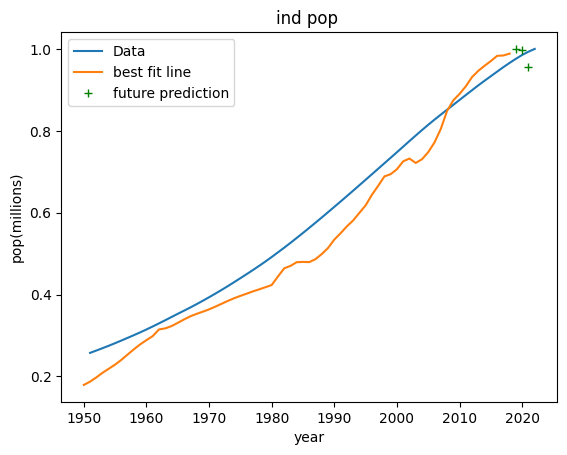

In [43]:
plt.xlabel('year')
plt.ylabel('pop(millions)')
plt.title('ind pop ')
plt.plot(year1,population1, label='Data')
plt.plot(train_year1, train_pop1, label='best fit line')
plt.plot(test_year1, test_pop1,'g+', label='future prediction')
plt.legend()


In [44]:
lrp1.predict([[2030],[2050]])*scaling_factor1

array([[1.51199182e+09],
       [1.84292680e+09]])